<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Graph_Algorithem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1-What are Graph Algorithms?**[1]
As a data scientist, you should be well aware to find relationships among people by using the network they create within each other. 
As machine learning practitioners, we have become quite comfortable with Pandas or SQL or any relational database. We are used to seeing our users in rows with their attributes in columns. But does the real world behave this way?

In a connected world, users cannot be seen as independent entities. They have certain relationships with each other and sometimes we would like to include such relationships when building our machine learning models.

Now, while in a relational database we cannot use such relationships between different users, in a graph database it is quite trivial to do so. In this article, I’m going to talk about some of the most important graphics algorithms you should know about and how to implement them using Python.


#**2-Graph Algorithms: Connected Components**

![](https://drive.google.com/uc?export=view&id=1Lt9dYrnxBUbJrmmHjEmrGT8YFlRvC4cD)

You can think of connected components in very simple terms as a kind of hard clustering algorithm that finds clusters in connected data

As a concrete example: let’s say you have data on the roads connecting two cities in the world. And you have to find out all the continents of the world and what city they contain.

As a concrete example: let’s say you have data on the roads connecting two cities in the world. And you have to find out all the continents of the world and what city they contain.

The algorithm of connected components that we use to do this is based on a special case of BFS / DFS. I won’t talk much about how it works here, but we’ll see how to get the code to work with Networkx.



I will be using the Networkx module in Python to build and analyze our graphical algorithms. Let’s start with an example chart that we use for our purpose. Contains cities and distance information between them.

I’ll start by creating a list of edges with the distances that I’ll add as the edge weight:

In [2]:
edgelist = [['Mannheim', 'Frankfurt', 85], ['Mannheim', 'Karlsruhe', 80], 
['Erfurt', 'Wurzburg', 186], ['Munchen', 'Numberg', 167], ['Munchen', 'Augsburg', 84], 
['Munchen', 'Kassel', 502], ['Numberg', 'Stuttgart', 183], ['Numberg', 'Wurzburg', 103], 
['Numberg', 'Munchen', 167], ['Stuttgart', 'Numberg', 183], ['Augsburg', 'Munchen', 84], 
['Augsburg', 'Karlsruhe', 250], ['Kassel', 'Munchen', 502], ['Kassel', 'Frankfurt', 173], 
['Frankfurt', 'Mannheim', 85], ['Frankfurt', 'Wurzburg', 217], ['Frankfurt', 'Kassel', 173], 
['Wurzburg', 'Numberg', 103], ['Wurzburg', 'Erfurt', 186], ['Wurzburg', 'Frankfurt', 217], 
['Karlsruhe', 'Mannheim', 80], ['Karlsruhe', 'Augsburg', 250],["Mumbai", "Delhi",400],
["Delhi", "Kolkata",500],["Kolkata", "Bangalore",600],["TX", "NY",1200],["ALB", "NY",800]]

In [4]:
import networkx as nx
g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0],edge[1], weight = edge[2])

We now want to discover the different continents and their cities from this graphic. We can now do this using the algorithm of connected components like:



In [5]:
for i, x in enumerate(nx.connected_components(g)):
    print("cc"+str(i)+":",x)

cc0: {'Munchen', 'Wurzburg', 'Frankfurt', 'Mannheim', 'Erfurt', 'Augsburg', 'Numberg', 'Kassel', 'Karlsruhe', 'Stuttgart'}
cc1: {'Kolkata', 'Delhi', 'Mumbai', 'Bangalore'}
cc2: {'TX', 'NY', 'ALB'}


So we can find distinct network components in our data by using edges and vertices. This graph algorithm can be used on different datasets to satisfy any use case as above

# **3-Graph Algorithms: Shortest Path**

Continuing with the above example only, we are given a graph with the cities of Germany and their respective distances. You want to know how to get from Frankfurt (the starting node) to Munich by covering the shortest distance.

Applying the shortest route in graphical algorithms is used in Google Maps to find the shortest route. Let’s say you are in a Walmart store. You have different aisles and the distance between all the aisles. You want to offer the customer the shortest route between aisle A and aisle D.


In [ ]:
print(nx.shortest_path(g, 'Stuttgart','Frankfurt',weight='weight'))
print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt',weight='weight'))

To find the shortest path between all the pairs we can simply use a for loop:



In [ ]:
for x in nx.all_pairs_dijkstra_path(g,weight='weight'):
    print(x)

#**4-Graph Algorithms: Pagerank**

It’s the page sorting algorithm that has fueled Google for a long time. It assigns scores to pages based on the number and quality of inbound and outbound links.

The Pagerank can be used anywhere we want to estimate the importance of nodes in any network. Here I am going to use Facebook data. We have an edge/link file between Facebook users. Let’s first create the FB graph using:

![](https://drive.google.com/uc?export=view&id=1IMeBsVLh4Q4uNRgl29TNvPUcYdrFu489)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
# load dataset
fraud_df = pd.read_csv("/content/drive/My Drive/Datasets/Graph Alogrithem/facebook-combined.txt")

In [23]:
fb = nx.read_edgelist('/content/drive/My Drive/Datasets/Graph Alogrithem/facebook-combined.txt', create_using = nx.Graph(), nodetype = int)


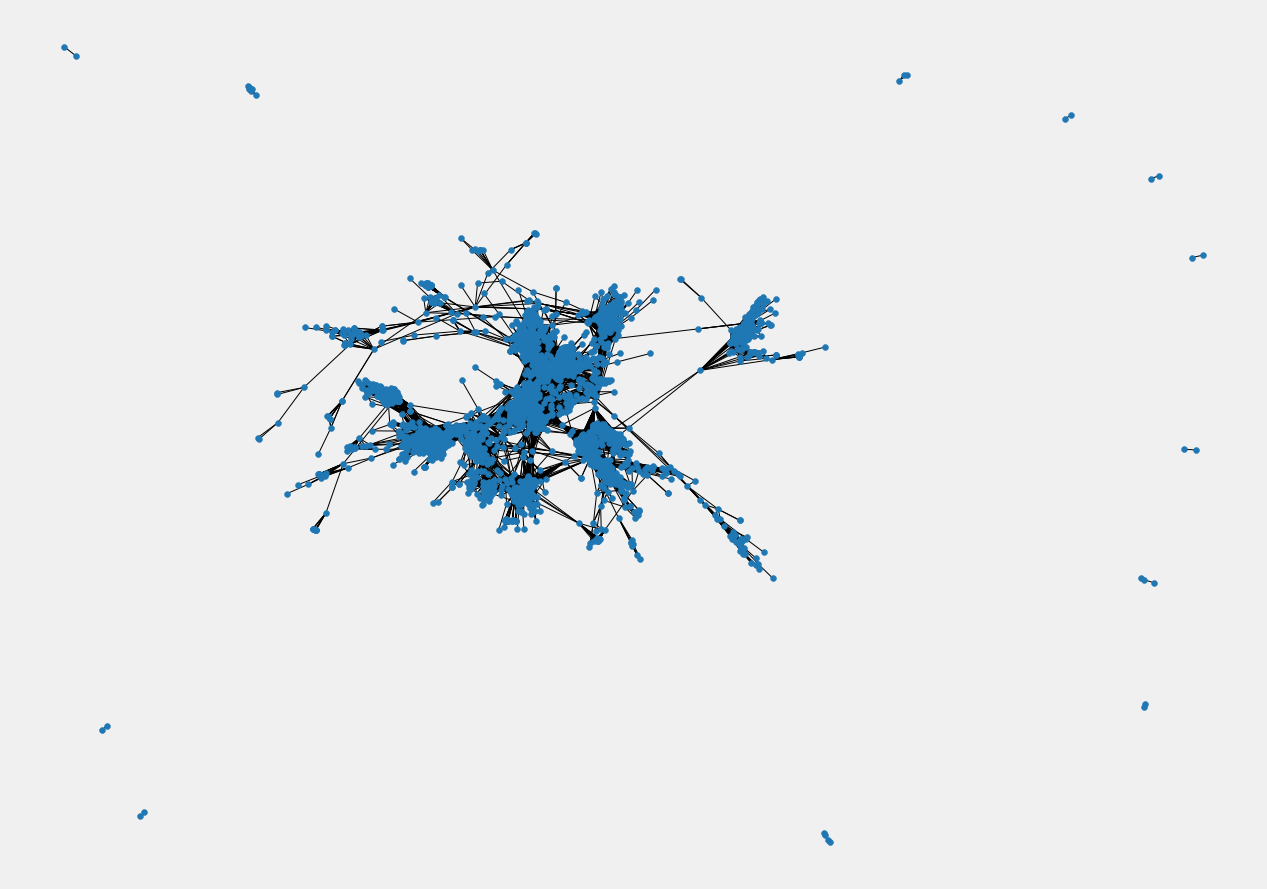

In [30]:

import matplotlib.pyplot as plt
pos = nx.spring_layout(fb)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

**Application[2]**

Pagerank can be used anywhere where we want to estimate node importance in any network.

- It has been used for finding the most influential papers using citations.
- Has been used by Google to rank pages
- It can be used to rank tweets- User and Tweets as nodes. Create Link between user if user A follows user B and Link between user and Tweets if user tweets/retweets a tweet.
- Recommendation engines

Now we want to find the users having high influence capability.[2]

Intuitively, the Pagerank algorithm will give a higher score to a user who has a lot of friends who in turn have a lot of FB Friends[2].

In [ ]:
pageranks = nx.pagerank(fb)
print(pageranks)

We can get the sorted PageRank or most influential users using:

In [ ]:
import operator
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True)
print(sorted_pagerank)

The above IDs are for the most influential users.

We can see the subgraph for the most influential user:

In [ ]:
first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x))
second_degree_connected_nodes.remove(3437)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))
subgraph_3437 = nx.subgraph(fb,first_degree_connected_nodes+second_degree_connected_nodes)
pos = nx.spring_layout(subgraph_3437)
node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]
node_size =  [1000 if v == 3437 else 35 for v in subgraph_3437]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )
plt.show()

# **4-Graph Algorithms: Centrality Measures**

There are many metrics of centrality that you can use as functionality for your machine learning models. I’ll talk about two of them:

- Centrality between the two: It is not only the users who have the most friends that are important, the users who connect one geography to another are also important because it allows users to see content from various geographies. The centrality of the in-between quantifies the number of times a particular node arrives in the shortest path chosen between two other nodes.
-Degree of centrality: this is simply the number of connections for a node


The centrality measures can be used as a feature in machine learning models:

In [ ]:
pos = nx.spring_layout(subgraph_3437)
betweennessCentrality = nx.betweenness_centrality(subgraph_3437,normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3437, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

# [1] **References**

[[1]Graph Algorithms with Python](https://thecleverprogrammer.com/2020/10/09/graph-algorithms-with-python/?fbclid=IwAR15GrrQsBy6Hu3kr2gQZCWu38SZcQKu9rZELwIFOKgEIczeErD0cFmi1mA)

[[2] The 5 Graph Algorithms That Data Scientists Should Know](https://www.kdnuggets.com/2019/09/5-graph-algorithms-data-scientists-know.html)